In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

# train model with data imputation

In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
web_features_use2 = []
bib_features_use2 = []
tag_features_use2 = []
label2 = []

In [4]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_journal_feature_2022/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_journal_feature_2022/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [5]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_journal_feature_2022/web_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_journal_feature_2022/web_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [6]:
labeled_journals = pd.read_csv('doaj_journal_list_urls_from_doaj_bing_v1.csv')

In [7]:
labeled_journals['ISSN'] = labeled_journals['ISSN'].apply(str.strip)

In [8]:
labeled_journals.shape

(15426, 11)

In [10]:
bibilometrics_after_average = pd.read_csv('doaj_bibilometrics_after_average.csv')

In [11]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]

        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features0.append(val)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([-1]*18)
    counter += 1

In [12]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal_Title_Normalized'] in (bibilometrics_after_average['NormalizedName'].tolist()):
        tmp = bibilometrics_after_average.index[bibilometrics_after_average['NormalizedName']==row['Journal_Title_Normalized']]
        #print(tmp)
        val = bibilometrics_after_average.iloc[tmp].drop(columns=['NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features1.append(val)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([-1]*18)
    counter += 1

In [13]:
len(web_features0)

12859

In [14]:
len(web_features0)+len(bib_features1)

15426

In [15]:
for ind,v in enumerate(zip(web_features0,bib_features0,tag_features0)):
    w = v[0]
    b = v[1]
    t = v[2]
    
    if len(b) == 18:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([-1]*18)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1])
    
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
        
    label2.append(0)

In [16]:
len(label2)

12859

In [17]:
for ind,v in enumerate(zip(web_features1,bib_features1,tag_features1)):
    w = v[0]
    b = v[1]
    t = v[2]

    if len(b) == 18:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([-1]*18)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1])
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
        
    label2.append(1)

In [18]:
len(label2)

15426

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
tag_x2 = vectorizer.fit_transform(tag_features_use2).todense()

In [21]:
pickle.dump(vectorizer, open('tag_tfidf_curr', 'wb'))

In [22]:
X2 = []

In [23]:
len(tag_x2[0].tolist()[0])

640

In [24]:
len(w),len(bib_features_use2[ind])

(8, 18)

In [25]:
for ind,w in enumerate(web_features_use2):
    tmp = w+bib_features_use2[ind]+tag_x2[ind].tolist()[0]
    #print(len(tmp))
    #print(len(bib_features_use2[ind]))
    X2.append(tmp)

In [80]:
[xx[0:16] for xx in X2]

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10555.0, 31, -1, -1, 1, 1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7076.857142857143, 28, -1, -1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 2, 1, 1, 1, 1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -

In [26]:
len(X2[0])

675

In [27]:
len(X2)

15426

In [28]:
X3 = np.array(X2)
y3 = np.array(label2)

In [29]:
len(web_features_use2)

15426

In [30]:
len(X2)

15426

In [31]:
X3[0]

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00,  1.94730000e+04, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00,  2.01200000e+03,  2.33333333e-01,  3.60000000e+02,
        5.72222222e-01,  2.77777778e-03,  5.00000000e-02,  2.77777778e-03,
        1.63055556e+00,  1.97222222e-01,  5.55555556e-03,  8.19444444e-01,
        1.11197917e+00,  1.75903614e+00,  3.01323024e+00,  5.55555556e-01,
        1.30555556e-01,  1.97222222e-01,  1.72222222e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [32]:
np.mean(y3)

0.166407364190328

In [33]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)

In [34]:
classifier.fit(X3,y3)

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [35]:
pickle.dump(classifier, open('all_features_imputed_randomforest', 'wb'))

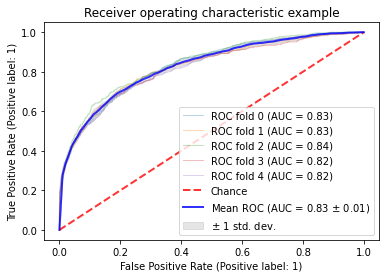

In [36]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
  
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [37]:
set(y3)

{0, 1}

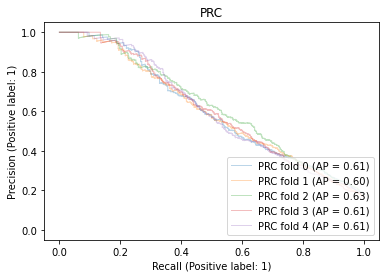

In [38]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [39]:
np.mean([0.61,0.60,0.63,0.61,0.61])

0.6119999999999999

In [40]:
np.std([0.61,0.60,0.63,0.61,0.61])

0.00979795897113272

In [50]:
np.mean([0.85,0.85,0.85,0.85,0.85])

0.852

In [52]:
np.std([0.85,0.85,0.85,0.85,0.85])

0.0040000000000000036

In [48]:
from sklearn.feature_selection import RFECV

In [64]:
X4 = np.array(X2)[:,:36]
y4 = np.array(label2)

In [65]:
estimator = RandomForestClassifier(max_depth=3,n_estimators = 500, random_state=0,n_jobs=6)

In [66]:
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=5)

In [67]:
selector = selector.fit(X4, y4)

In [72]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False])

In [79]:
len(selector.support_[12:])

24

In [78]:
bibilometrics_after_average.columns,[selector.support_[12:]]

(Index(['Reason', 'NormalizedName', 'journal_year_first_publish',
        'total_num_journal_cited', 'num_journal_publication',
        'total_num_journal_reference', 'journal_num_journal_self_cited',
        'journal_journal_cited_num', 'journal_num_journal_self_reference',
        'journal_avg_last_author_hindex', 'num_journal_author',
        'journal_num_author_self_reference', 'journal_num_author_referenced',
        'journal_avg_middle_author_hindex', 'journal_avg_first_author_hindex',
        'journal_avg_hindex', 'journal_num_author_cited',
        'journal_num_affiliation_cited', 'num_journal_affiliation',
        'journal_num_affiliation_referenced'],
       dtype='object'),
 [array([False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False,  True, False,  True, False,
         False,  True, False, False, False, False])])

# use model to predict journals in survey

In [ ]:
survey_web_features = []

for batch in range(0,10):
    with open('./survey_journal_feature/web_content_features_'+str(batch)+'.pkl', 'rb') as f:
        survey_web_features += pickle.load(f)

In [ ]:
survey_tag_features = []

for batch in range(10):
    with open('./survey_journal_feature/web_tag_features_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

In [ ]:
len(survey_web_features),len(survey_tag_features),

In [ ]:
#drop two duplicated columns: save value but different column name
survey_bibilometrics = pd.read_csv('survey_journal_bibliometrics.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [ ]:
survey_bibilometrics = survey_bibilometrics.reindex(columns=['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ])

In [ ]:
to_average = ['num_journal_author','num_journal_affiliation','total_num_journal_reference',
              'total_num_journal_cited','journal_journal_cited_num',
              'journal_num_author_referenced','journal_num_affiliation_referenced','journal_num_author_cited',
              'journal_num_affiliation_cited','journal_num_journal_self_reference','journal_num_author_self_reference',
              'journal_num_affiliation_self_reference','journal_num_journal_self_cited','journal_journal_cited_num'
             ]

In [ ]:
to_ignore = ['journal_paper_cited','journal_journal_reference','journal_num_affiliation_self_reference','journal_num_author_self_cited','journal_num_affiliation_self_cited']

In [ ]:
all_features = ['NormalizedName','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ]
features_to_use = [f for f in all_features if f not in to_ignore] 

In [ ]:
[f for f in to_average if f not in all_features ]

In [ ]:
survey_bibilometrics1 = survey_bibilometrics[survey_bibilometrics['journal_paper_reference_num'] != 0]

In [ ]:
survey_bibilometrics2 = survey_bibilometrics1[survey_bibilometrics1['num_journal_author'] != 0]

In [ ]:
survey_bibilometrics3 = survey_bibilometrics2[survey_bibilometrics2['num_journal_publication']>10]

In [ ]:
survey_bibilometrics3[survey_bibilometrics3['journal_num_affiliation_referenced'] == 0]

In [ ]:
survey_bibilometrics_to_check0 = survey_bibilometrics3[features_to_use].copy()
survey_bibilometrics_to_check = survey_bibilometrics_to_check0[survey_bibilometrics_to_check0['journal_year_first_publish']>=1980]

In [ ]:
survey_bibilometrics_to_check.shape

In [ ]:
survey_bibilometrics_after_average = survey_bibilometrics_to_check.copy()

In [ ]:
for x in survey_bibilometrics_after_average.columns:
    if x in to_average:
        survey_bibilometrics_after_average[x] = survey_bibilometrics_after_average[x]/survey_bibilometrics_after_average['num_journal_publication']

In [ ]:
survey_bibilometrics_after_average.columns

In [ ]:
survey_web_features_use = []
survey_bib_features_use = []
survey_tag_features_use = []

In [ ]:
for ind,v in enumerate(zip(survey_web_features,survey_bibilometrics,survey_tag_features)):
    w = v[0]
    b = v[1]
    t = v[2]
    
    if len(b) == 18:
        survey_bib_features_use.append(b)
    else:
        survey_bib_features_use.append([-1]*18)
    if len(w) > 9:
        survey_web_features_use.append(w)
    else:
        survey_web_features_use.append([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 19473, -1, -1, -1, -1, -1,-1])
    
    if len(t) > 1:
        survey_tag_features_use.append(t)
    else:
        survey_tag_features_use.append('empty html tag')

In [ ]:
survey_tag_x = vectorizer.fit_transform(survey_tag_features_use).todense()

In [ ]:
survey_X = []

In [ ]:
for ind,w in enumerate(survey_web_features_use):
    tmp = w+survey_bib_features_use[ind]+survey_tag_x[ind].tolist()[0]

    survey_X.append(tmp)

In [ ]:
survey_XX = np.array(survey_X)